In [1]:
%matplotlib inline 
import matplotlib.pylab as plt 
plt.rcParams.update({'figure.max_open_warning': 0})
import numpy as np 
import pandas as pd 
import seaborn as sns 
from sklearn.cluster.bicluster import SpectralBiclustering

In [2]:
def reduce_data(data,label_name):
    
    reduced_data = pd.DataFrame()

    for name,group in data.groupby('District'):
        drought_years = np.array(group[group[label_name]]['year'])
        keep_years = np.sort(np.unique(np.append(drought_years, [drought_years-1, drought_years+1])))
        temp = group[group.year.apply(lambda x: x in keep_years)].sort_values(by=['year', 'Season']).copy()
        reduced_data = pd.concat([reduced_data, temp])
        
    reduced_data.sort_values('year',inplace=True)
    reduced_data.reset_index(drop=True,inplace=True)
    
    return reduced_data

In [3]:
def plot_dist(data,target,drought_var):
    plt.figure()
    plt.subplot(1,2,1)
    sns.boxenplot(y=target,x=drought_var,data=data)
    plt.subplot(1,2,2)
    bins = np.arange(data[target].min(),data[target].max(),0.05*(data[target].max()-data[target].min()))
    ax=sns.distplot((data[(data[drought_var].notna())&(data[drought_var]==False)][target]).dropna()
                 ,bins=bins,label='False')
    sns.distplot(data[(data[drought_var].notna())&(data[drought_var]==True)][target].dropna(),
                bins=bins,label='True')
    ax.yaxis.set_label_position("right")
    plt.ylabel('distribution')
    ax.yaxis.tick_right()
    plt.legend(loc="best")
    return

In [4]:
filename = './datasets/Uganda_seasonal_normalized.csv'
data = pd.read_csv(filename)
data.dropna(inplace=True)
data.head()

,year,District,Season,EVI,NDVI,SPEI_3month,SoilMoisture00_10cm,SoilMoisture100_200cm,SoilMoisture10_40cm,SoilMoisture40_100cm,...,SoilTemperature40_100cm,air_temperature,evapotranspiration,precipitation_per_hour_v1,precipitation_per_hour_v2,rainfall,surface_temperature_daytime,surface_temperature_nighttime,wind_speed,drought_reported
0,2000,ABIM,11_12,0.635496,0.232554,0.946693,0.876312,0.199678,0.736812,0.605763,...,-0.552902,-0.435935,1.208654,1.601028,-0.469460,1.336204,-0.151764,-1.343323,-0.412148,False
1,2000,ABIM,6_7,-1.590836,-1.720571,0.075238,-1.302612,-1.113239,-1.262019,-0.937505,...,1.414168,1.570308,-0.740945,-0.358292,-1.030145,-0.388903,1.260564,0.032762,0.306375,False
2,2000,ADJUMANI,11_12,-1.085335,-1.260320,-0.606487,-0.724946,-0.722124,-0.683251,-0.829818,...,0.199455,-0.221168,-1.138716,0.041021,-2.093348,-1.024165,1.721439,-1.782573,-0.412293,False
3,2000,ADJUMANI,6_7,-2.697474,-3.056846,-0.816605,-0.872943,0.243240,-0.161562,0.000243,...,1.332993,1.546512,-0.115219,-1.671680,-1.859843,-0.681410,2.350867,-0.480881,0.608132,False
4,2000,AGAGO,11_12,1.149972,-0.070580,0.824262,0.874588,0.624983,0.793872,0.710458,...,-0.539216,-0.380892,1.126550,1.366786,0.265181,0.963633,-0.414698,-2.063056,-0.467823,False


In [5]:
id_cols = ['year','District','Season']

label_name = 'drought_reported'

All_features = list(data.drop(labels=id_cols+[label_name], 
                                  axis=1).columns)

In [6]:
reduced_data = reduce_data(data,label_name)

,EVI,NDVI,surface_temperature_daytime,air_temperature,surface_temperature_nighttime,rainfall,evapotranspiration,SoilTemperature40_100cm,SoilTemperature10_40cm,SoilTemperature00_10cm,SoilMoisture40_100cm,SoilMoisture10_40cm,SoilMoisture100_200cm,SoilMoisture00_10cm,SoilTemperature100_200cm,precipitation_per_hour_v1,precipitation_per_hour_v2,SPEI_3month,wind_speed
EVI,1.000000,0.876824,0.738907,0.560195,0.179109,0.411251,0.391268,0.572731,0.580934,0.570941,0.378691,0.451269,0.164817,0.502302,0.541593,0.278964,0.275295,0.299335,0.203378
NDVI,0.876824,1.000000,0.730287,0.469747,0.196783,0.352660,0.394463,0.502899,0.502019,0.482754,0.319544,0.395720,0.137697,0.445350,0.486367,0.230167,0.227885,0.236666,0.186935
surface_temperature_daytime,0.738907,0.730287,1.000000,0.653017,0.351859,0.471565,0.422645,0.642663,0.652613,0.651245,0.404549,0.464051,0.207844,0.514984,0.615225,0.469072,0.362800,0.331566,0.351421
air_temperature,0.560195,0.469747,0.653017,1.000000,0.385112,0.571771,0.381459,0.871291,0.895548,0.913256,0.540526,0.605036,0.398302,0.647697,0.816779,0.402324,0.443073,0.476156,0.365570
surface_temperature_nighttime,0.179109,0.196783,0.351859,0.385112,1.000000,0.163236,0.118886,0.348729,0.342838,0.343478,0.000372,0.023110,0.034585,0.075939,0.362551,0.374719,0.063367,0.103589,0.276973
rainfall,0.411251,0.352660,0.471565,0.571771,0.163236,1.000000,0.769358,0.655783,0.695680,0.744352,0.722200,0.810226,0.472772,0.854182,0.588444,0.433925,0.578165,0.862222,0.443933
evapotranspiration,0.391268,0.394463,0.422645,0.381459,0.118886,0.769358,1.000000,0.665421,0.664346,0.645895,0.782740,0.833038,0.547028,0.833183,0.651454,0.220132,0.346371,0.415340,0.334728
SoilTemperature40_100cm,0.572731,0.502899,0.642663,0.871291,0.348729,0.655783,0.665421,1.000000,0.993774,0.963758,0.734832,0.789618,0.557000,0.805482,0.984815,0.294942,0.365533,0.430670,0.376815
SoilTemperature10_40cm,0.580934,0.502019,0.652613,0.895548,0.342838,0.695680,0.664346,0.993774,1.000000,0.986371,0.739960,0.803337,0.546942,0.827725,0.960593,0.333569,0.405107,0.483049,0.401743
SoilTemperature00_10cm,0.570941,0.482754,0.651245,0.913256,0.343478,0.744352,0.645895,0.963758,0.986371,1.000000,0.736323,0.804502,0.528358,0.839553,0.909714,0.387325,0.461233,0.559266,0.439123


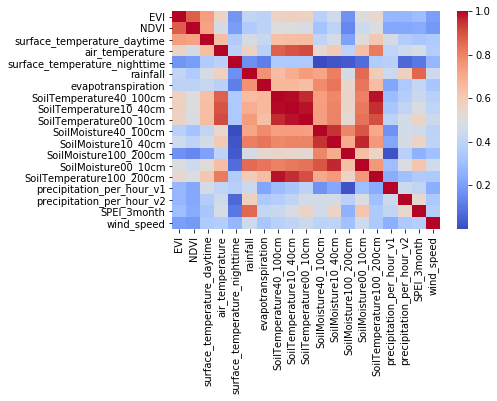

In [8]:
features = reduced_data[All_features].copy()
feature_corr = features.corr().abs()

bicluster_model = SpectralBiclustering(n_clusters=3, method='log',
                             random_state=0)
bicluster_model.fit(feature_corr)
feature_corr_sorted = feature_corr.values[np.argsort(bicluster_model.row_labels_),:]
feature_corr_sorted = feature_corr_sorted[:, np.argsort(bicluster_model.column_labels_)]
rows = feature_corr.columns[np.argsort(bicluster_model.row_labels_)]
cols = feature_corr.columns[np.argsort(bicluster_model.column_labels_)]
feature_corr_sorted = pd.DataFrame(feature_corr_sorted,index=rows,columns=cols)
sns.heatmap(feature_corr_sorted,cmap='coolwarm')
feature_corr_sorted 

In [19]:
median_vals = reduced_data[All_features+[label_name]].groupby(label_name).median().T.reset_index()
median_vals.rename(columns={True:'yes_drought', False:'no_drought', 'Is_drought':'index'}, inplace= True)
median_vals['diff'] = (median_vals['yes_drought']-median_vals['no_drought']).abs()
median_vals.sort_values('diff',ascending=False,inplace=True)
median_vals.reset_index(inplace=True,drop=True)
median_vals

drought_reported,index,no_drought,yes_drought,diff
0,SoilMoisture00_10cm,0.280299,-0.570226,0.850525
1,precipitation_per_hour_v2,0.063213,-0.698218,0.761430
2,SoilMoisture10_40cm,0.216020,-0.530722,0.746742
3,SoilMoisture40_100cm,0.203412,-0.531513,0.734925
4,evapotranspiration,0.044880,-0.602795,0.647675
5,rainfall,0.158049,-0.486975,0.645024
6,SoilTemperature100_200cm,-0.268359,0.320006,0.588365
7,SoilTemperature40_100cm,-0.224721,0.361192,0.585913
8,SoilTemperature10_40cm,-0.211171,0.302455,0.513625
9,SoilTemperature00_10cm,-0.144578,0.340174,0.484752


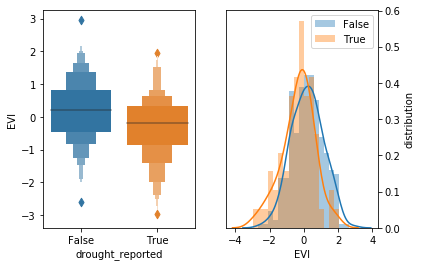

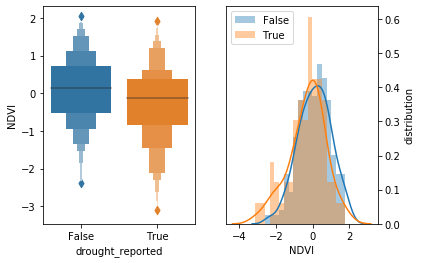

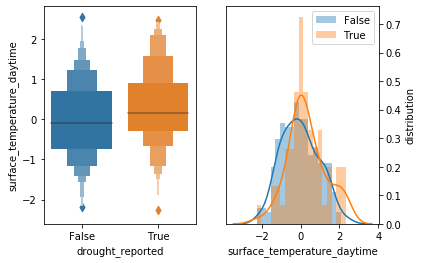

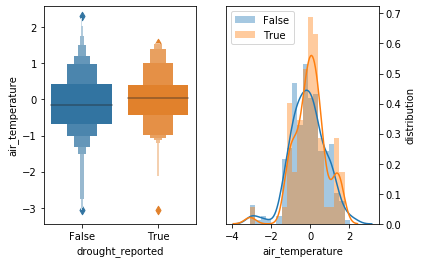

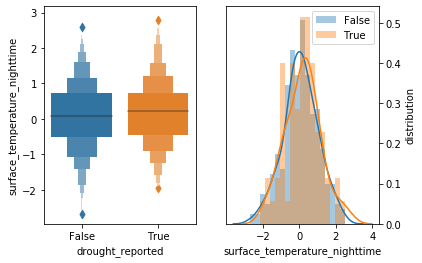

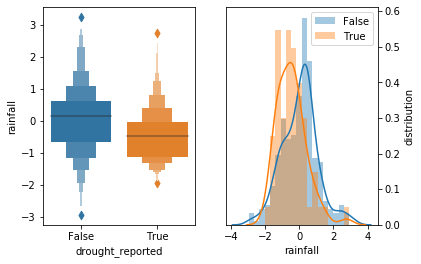

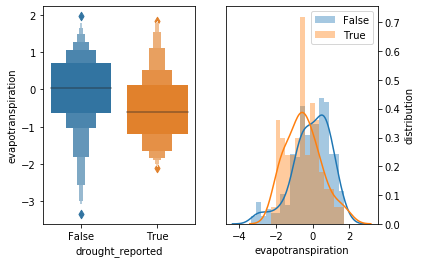

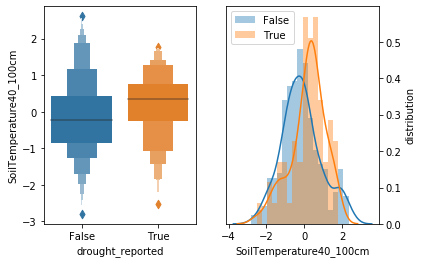

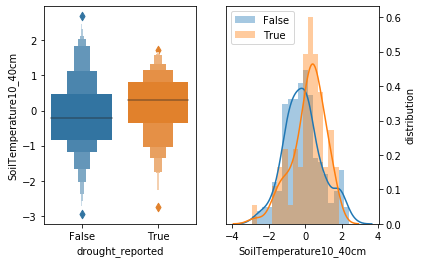

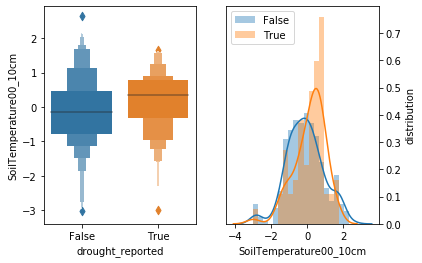

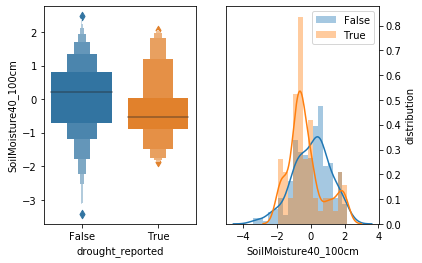

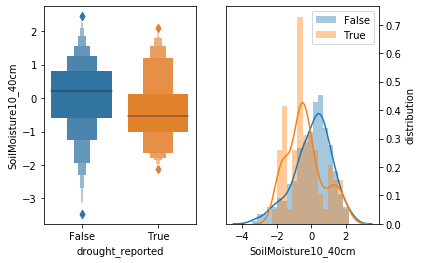

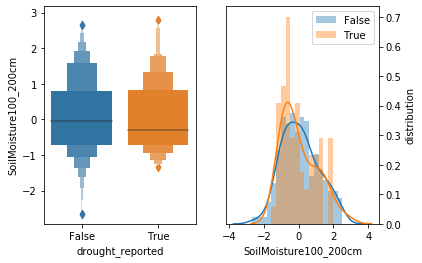

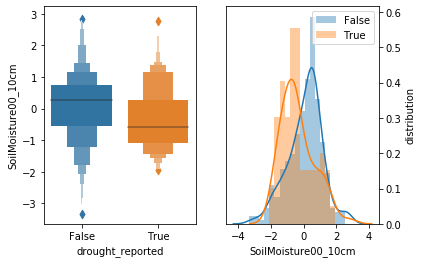

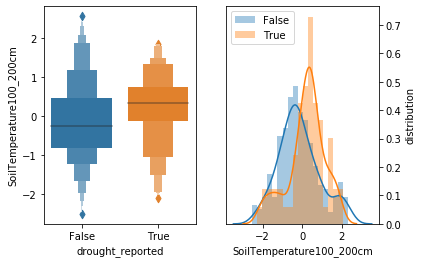

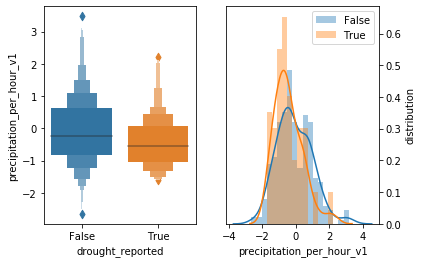

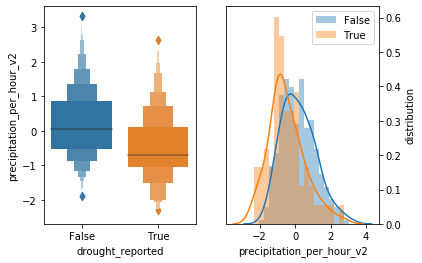

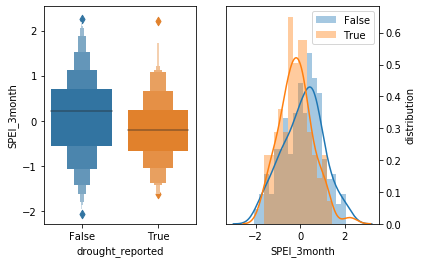

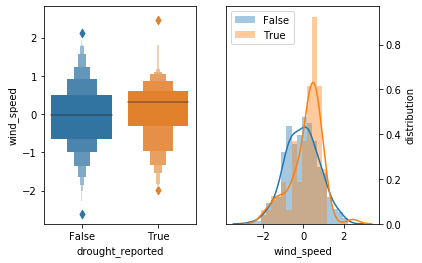

In [25]:
targets = feature_corr_sorted.columns

for target in targets:
    plot_dist(reduced_data,target,label_name)

['SoilMoisture00_10cm', 'SoilMoisture100_200cm', 'SoilMoisture10_40cm', 'SoilMoisture40_100cm', 'SoilTemperature00_10cm', 'SoilTemperature100_200cm', 'SoilTemperature10_40cm', 'SoilTemperature40_100cm', 'evapotranspiration', 'rainfall']


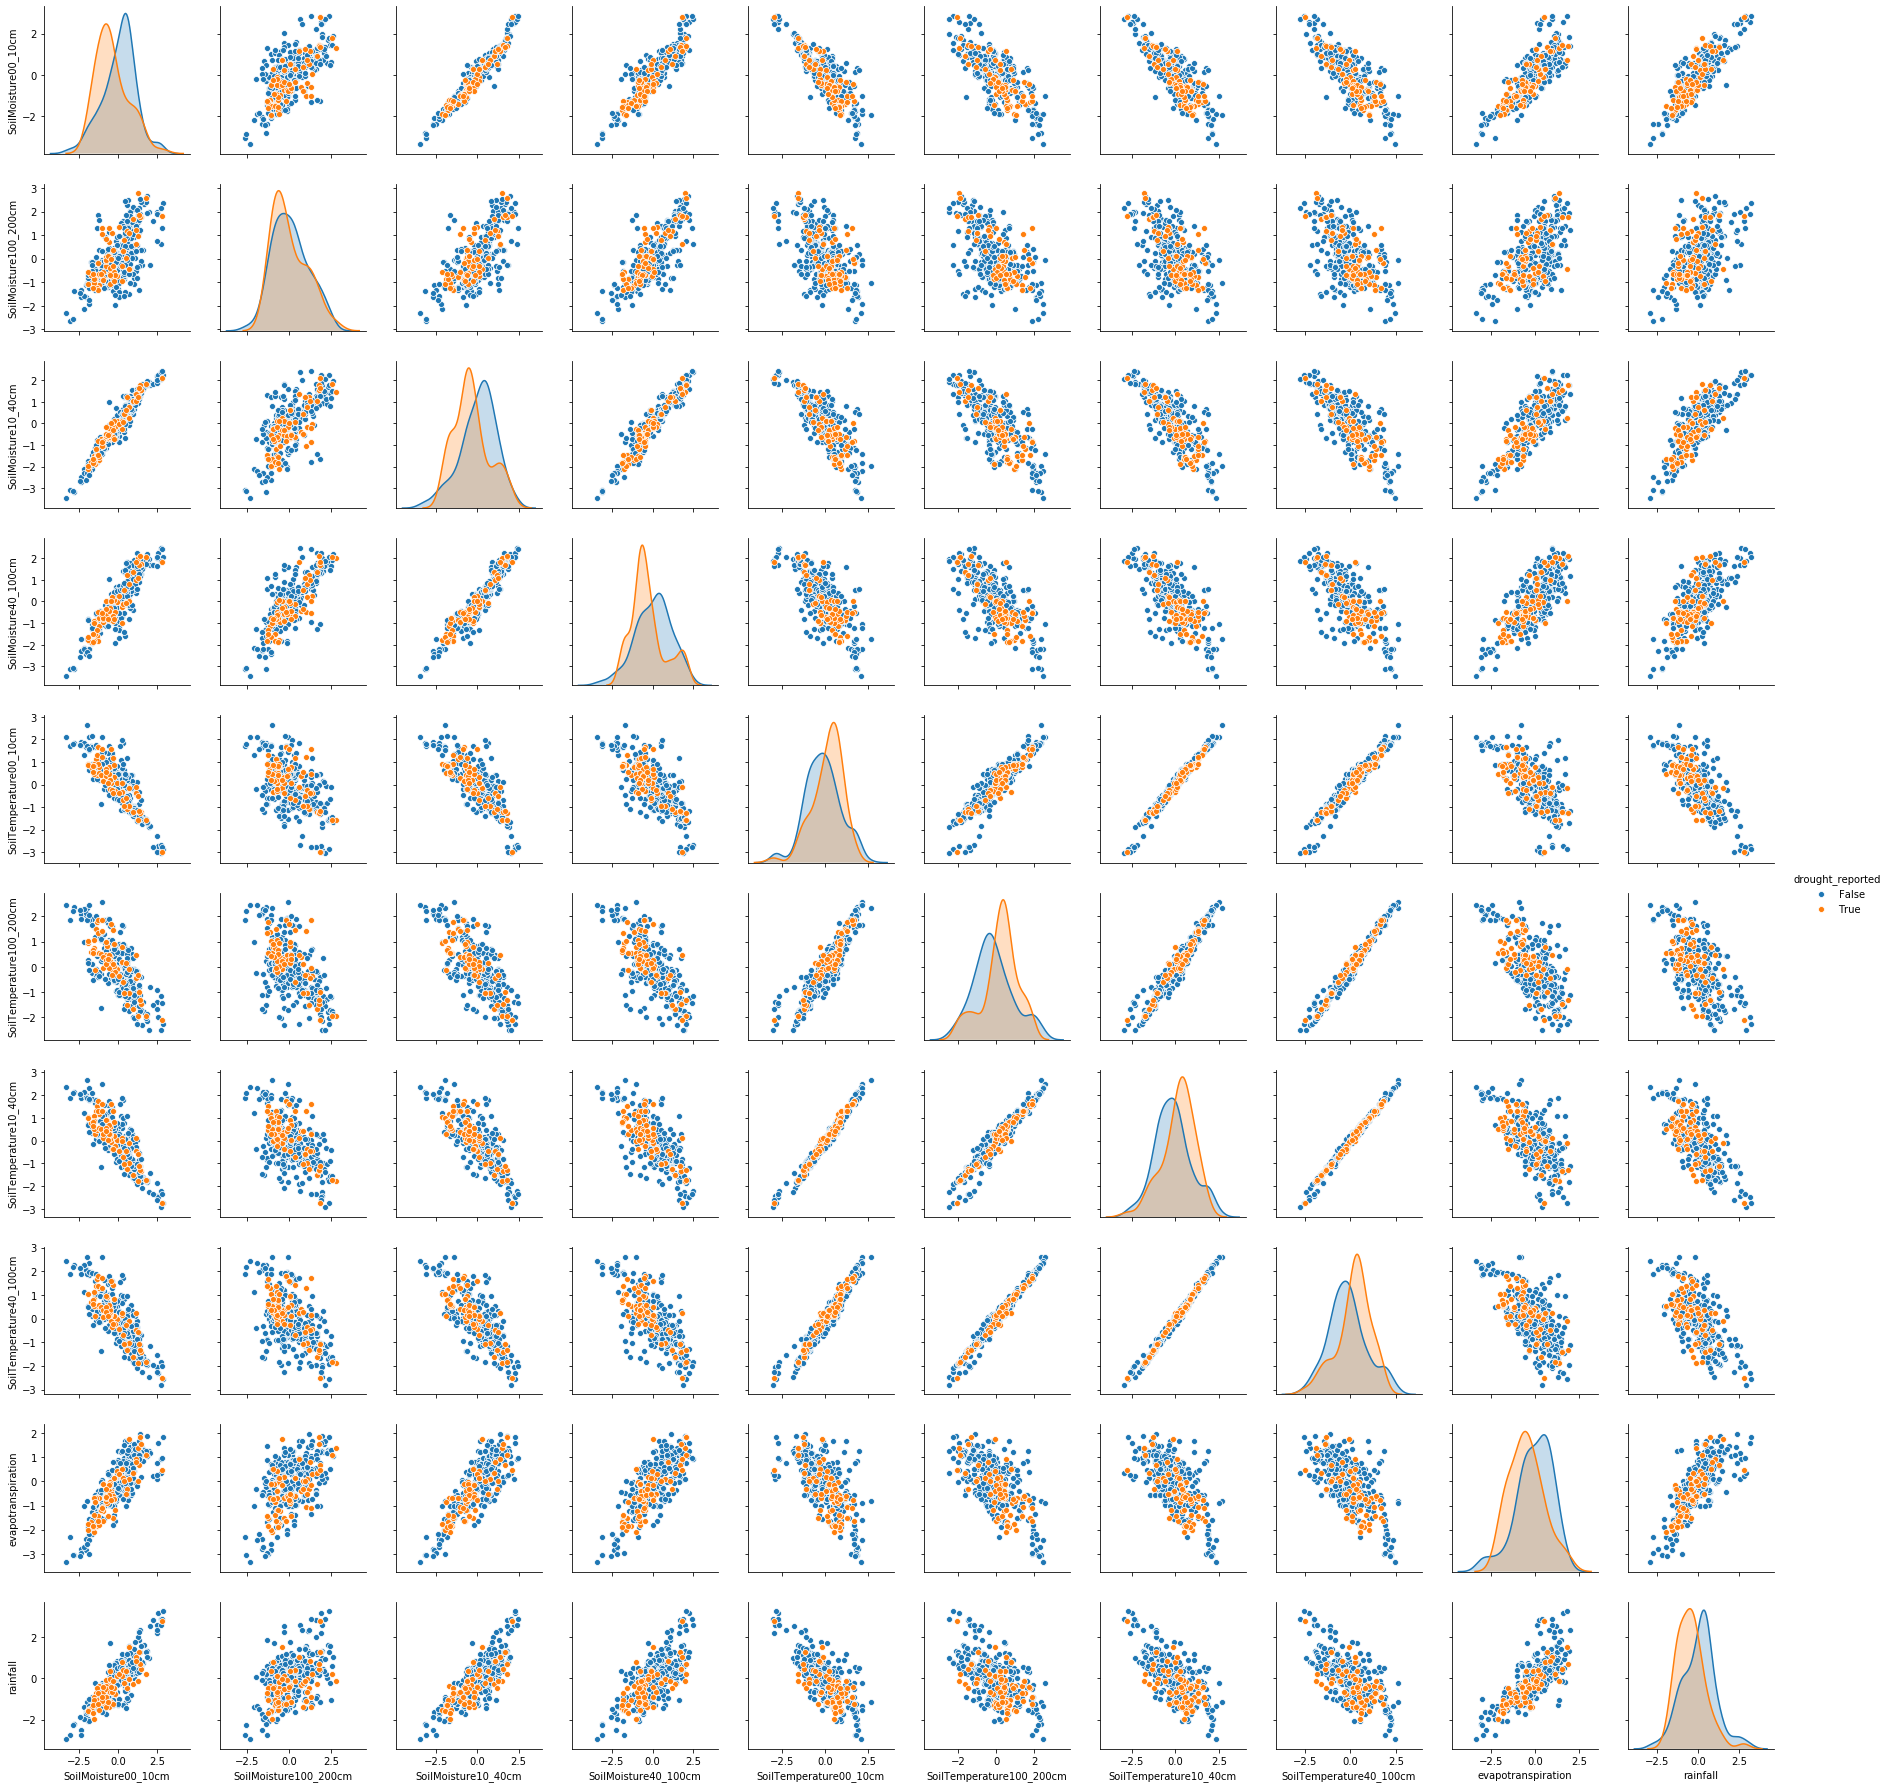

In [26]:
gruop_1 = feature_corr.columns[bicluster_model.row_labels_==1]

print(list(gruop_1))

sns.pairplot(reduced_data, vars=gruop_1, hue=label_name)

Index(['EVI', 'NDVI', 'air_temperature', 'surface_temperature_daytime',
       'surface_temperature_nighttime'],
      dtype='object')


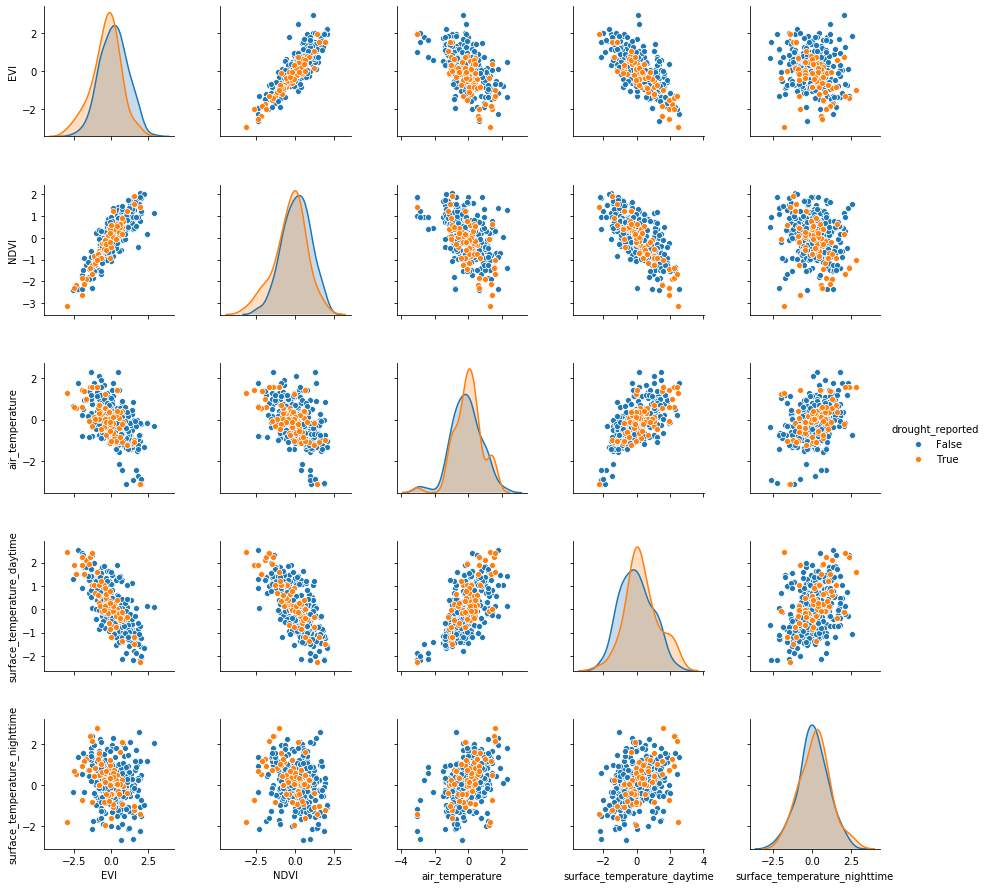

In [27]:
gruop_0 = feature_corr.columns[bicluster_model.row_labels_==0]

print(gruop_0)

sns.pairplot(reduced_data, vars=gruop_0, hue=label_name)

Index(['SPEI_3month', 'precipitation_per_hour_v1', 'precipitation_per_hour_v2',
       'wind_speed'],
      dtype='object')


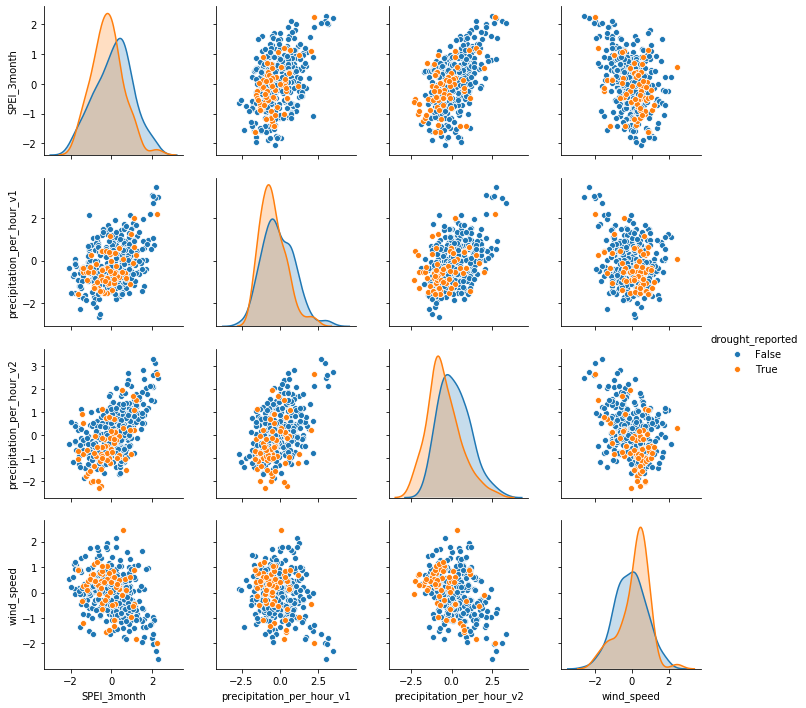

In [28]:
gruop_2 = feature_corr.columns[bicluster_model.row_labels_==2]

print(gruop_2)

sns.pairplot(reduced_data, vars=gruop_2, hue=label_name)